In [692]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [693]:
pd.set_option("display.max_row", 50)
pd.set_option("display.max_column", 150)

In [694]:
df=pd.read_csv(r'Leads.csv')

## Inspecting the dataframe 

In [695]:
df.shape

(9240, 37)

In [696]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [697]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [698]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Now we will do preprocessing to clean the data.

In [699]:
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [700]:
100*(df.isnull().sum().sort_values(ascending=False)/df.shape[0])

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [701]:
## by analysing data dictionary. these columns should be dropped as they doesnot seem to be useful in or analysis
df=df.drop(['Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score', 'City', 'Country'], axis=1) 

In [702]:
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Prospect ID                                         0
Digital Advertisement                               0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The

In [703]:
df['Asymmetrique Activity Index'].isnull().sum() ## records with null values

4218

In [704]:
# value count of 'Asymmetrique Activity Index' . Important is 01.High value count
df['Asymmetrique Activity Index'].value_counts() 

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [705]:
##Replacing 01. high with 1, 02.Medium with 2 rest all with 3
df['Asymmetrique Activity Index']=df['Asymmetrique Activity Index'].apply(lambda
            x:1 if x=='01.High' else 2 if x=='02.Medium' else 3)

In [706]:
df['Asymmetrique Activity Index'].value_counts()


Asymmetrique Activity Index
3    4580
2    3839
1     821
Name: count, dtype: int64

In [707]:
df['Asymmetrique Activity Index'].isnull().sum()

0

In [708]:
df.shape

(9240, 32)

In [709]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,2,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,2,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,2,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,2,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,2,No,No,Modified


In [710]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [711]:
# Checking if there are columns with one less variation in values since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [712]:
## Now, clearly the variables Prospect ID and Lead Number won't be of any use in the analysis, so we will drop these two variables.
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [713]:
df.shape

(9240, 30)

In [714]:
## Now we will se value count of all the variable.
objectcols=df.loc[:,df.dtypes=="object"]
object_cols=list(objectcols)

for col in object_cols:
    print(df[col].astype('category').value_counts())
    print("___________________________________________________")


Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
___________________________________________________
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
___________________________________________________
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
___________________________________________________

In [715]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'Asymmetrique Activity Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [716]:
## By analyzing above result, I noticed "Do Not Call, Search, Magazine, Newspaper Article,X Education Forums, Newspaper, 
## Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content,
## Get updates on DM Content, I agree to pay the amount through cheque, What matters most to you in choosing a course" , these columns have less than 0.05% variation in the values.
# so best approach is to drop these columns as they won't help with our analysis. Also, Tags,Lead Quality, lead Profile is also having lots of null values so dropping that aslo


df= df.drop([ 'Do Not Call', 'Search', 'Magazine', 'Tags','Newspaper Article','Lead Quality','Lead Profile', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations', 'Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','What matters most to you in choosing a course','Update me on Supply Chain Content'],axis=1)

In [717]:
df.shape

(9240, 14)

In [718]:
df.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
How did you hear about X Education        2207
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
Asymmetrique Activity Index                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [719]:
df['What is your current occupation'].value_counts() ## value count for What is your current occupation

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [720]:
df['What is your current occupation'].isnull().sum()

2690

In [721]:
df['What is your current occupation']=df['What is your current occupation'].fillna('Unknown')

In [722]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [723]:
df['What is your current occupation'].isnull().sum()

0

In [724]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [725]:
df.loc[df['How did you hear about X Education']=='Select','How did you hear about X Education']=np.nan

In [726]:
df['How did you hear about X Education']=df['How did you hear about X Education'].fillna("Dont know") ## replacing all null values with "Dont Know"

In [727]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Dont know                7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [728]:
df['How did you hear about X Education'].isnull().sum()

0

In [729]:
col_name = (df.isnull().sum()/df.shape[0])*100 
col_name = col_name[col_name>= 15] 
col_name

Specialization    15.562771
dtype: float64

In [730]:
col_name=col_name.index.tolist()

In [731]:
for i in col_name:
    df[i]=df[i].fillna('Unknown')

In [732]:
df.isnull().sum()

Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
Specialization                              0
How did you hear about X Education          0
What is your current occupation             0
Asymmetrique Activity Index                 0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [733]:
df.shape

(9240, 14)

In [734]:
df=df.dropna() ##dropping those records which have null values as value caount is very less(less than 2%)

In [735]:
df.shape

(9074, 14)

In [736]:
df.isnull().sum() ## no null or missing values 

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
How did you hear about X Education        0
What is your current occupation           0
Asymmetrique Activity Index               0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [737]:
## % of data retained

print(len(df.index))
print(len(df.index)/9240)

9074
0.982034632034632


we have retained 98% of data which is good

In [738]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   How did you hear about X Education      9074 non-null   object 
 10  What is your current occupation         9074 non-null   object 
 

### EDA

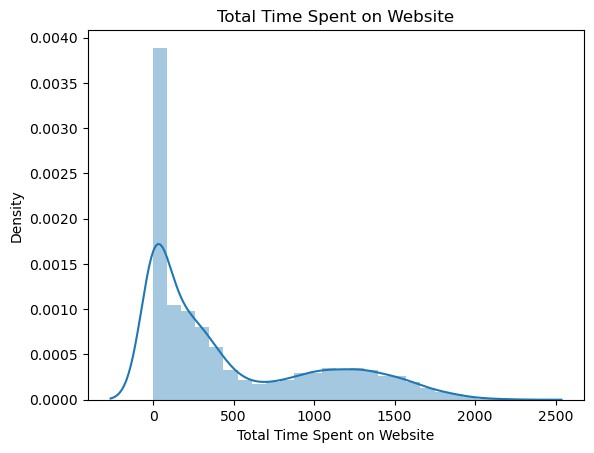

In [739]:
plt.title('Total Time Spent on Website')
sns.distplot(df['Total Time Spent on Website'])
plt.show()

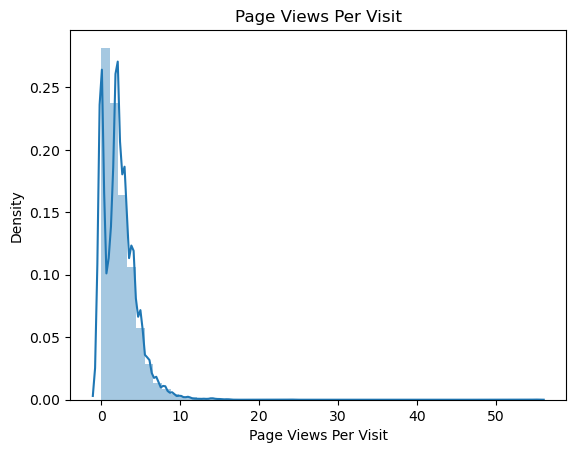

In [740]:

plt.title('Page Views Per Visit')
sns.distplot(df['Page Views Per Visit'])
plt.show()

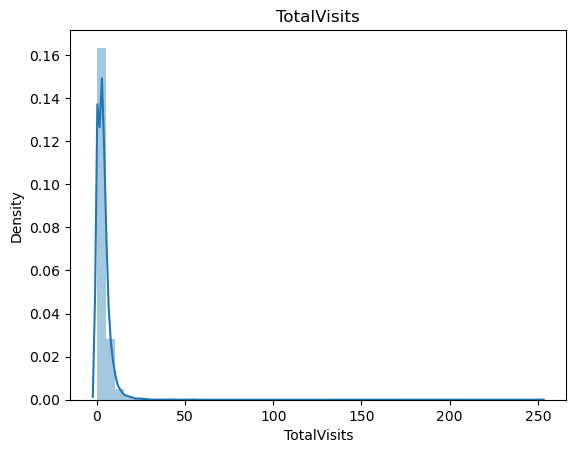

In [741]:
plt.title('TotalVisits')
sns.distplot(df['TotalVisits'])
plt.show()

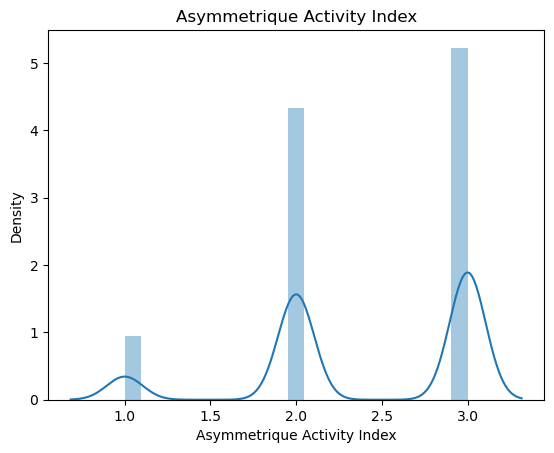

In [742]:
  
plt.title('Asymmetrique Activity Index')
sns.distplot(df['Asymmetrique Activity Index'])
plt.show()



-------------------------------------------------------------------------------------------------------------------------------

### Dummy Variable creation

In [743]:
objectcols=df.loc[:,df.dtypes=="object"]
object_cols=list(objectcols)
object_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [744]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 
                              'How did you hear about X Education',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)


In [745]:

df = pd.concat([df, dummy], axis=1) 

In [746]:
## creating dummy for specialization and deleting the select column as it is not useful
dummy_spl = pd.get_dummies(df['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
df = pd.concat([df, dummy_spl], axis = 1)

In [747]:
df['Specialization'].value_counts()

Specialization
Select                               1851
Unknown                              1431
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [748]:
df.shape

(9074, 104)

In [749]:
df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'How did you hear about X Education',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [750]:
df.shape

(9074, 95)

In [751]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,How did you hear about X Education_Dont know,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown
0,0,0.0,0,0.0,2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,

### Test-Train Split

Now we will split the dataset into training an testing sets.

In [752]:
##Importing the required library

from sklearn.model_selection import train_test_split

In [753]:
## Extracting the target variable
X=df.drop(['Converted'],axis=1)
X.shape

(9074, 94)

In [754]:
## Putting the target variable in y
y=df['Converted']
y.shape

(9074,)

In [755]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,How did you hear about X Education_Dont know,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown
0,0,0.0,0,0.0,2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,

In [756]:
##splitting the data into 70% train set and #0% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [757]:

print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (6351, 94)
y_train Size (6351,)


### Scaling

In [758]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [759]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaling_var=['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

scaler=MinMaxScaler()
X_train[scaling_var]=scaler.fit_transform(X_train[scaling_var])

In [760]:
##plt.figure(figsize = (50,50))
df.corr(numeric_only=True)
##plt.show()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,How did you hear about X Education_Dont know,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown
Converted,1.000000,0.032855,0.359261,0.000260,-0.005860,-0.037481,0.300775,-0.009328,-0.073186,-0.010651,0.029960,0.019024,0.013451,-0.124085,-0.000581,-0.008194,-0.011588,0.255480,-0.031812,0.003718,0.013451,0.150027,-0.011237,-0.008194,-0.018326,-0.008194,-0.008194,-0.008194,-0.140786,-0.115775,-0.127327,-0.037746,0.019024,-0.023051,0.019024,-0.032183,0.045672,-0.208619,-0.080999,0.013451,0.335815,-0.011625,-0.023562,-0.011237,-0.008194,-0.050776,0.013422,-0.002727,0.029620,0.007358,-0.016750,0.005389,0.032082,0.023271,0.040372,0.018578,-0.006074,0.126822,-0.321473,0.316246,-0.030860,-0.038445,-0.034043,0.019024,-0.013084,0.013451,-0.008194,0.044577,-0.263532,-0.071564,-0.033830,0.013451,0.360233,0.037893,-0.016286,-0.008194,0.044807,0.026549,-0.001661,-0.006241,0.043580,0.029621,0.

## Model Building

In [761]:
# Import 'LogisticRegression' and RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()
logreg.fit(X_train,y_train)
rfe = RFE(logreg,n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [762]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Asymmetrique Activity Index', False, 43),
 ('Lead Origin_Landing Page Submission', False, 22),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 54),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 59),
 ('Lead Source_NC_EDM', False, 16),
 ('Lead Source_Olark Chat', False, 15),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 49),
 ('Lead Source_Press_Release', False, 67),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 39),
 ('Lead Source_WeLearn', False, 75),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 73),
 ('Lead Source_blog', False, 56),
 ('Lead Source_google', False, 55),
 ('Lead Source_testone', False, 50),
 ('Lead S

In [763]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [764]:
del_col=X_train.columns[~rfe.support_]
del_col

Index(['Asymmetrique Activity Index', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Act

In [765]:
# Import statsmodels

import statsmodels.api as sm

# Building Statsmodel for detailed analysis

In [766]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6351 entries, 3009 to 5754
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6351 non-null   float64
 1   TotalVisits                                           6351 non-null   float64
 2   Total Time Spent on Website                           6351 non-null   float64
 3   Page Views Per Visit                                  6351 non-null   float64
 4   Lead Origin_Lead Add Form                             6351 non-null   float64
 5   Lead Source_Direct Traffic                            6351 non-null   float64
 6   Lead Source_Google                                    6351 non-null   float64
 7   Lead Source_Organic Search                            6351 non-null   float64
 8   Lead Source_Referral Sites                            6351 n

In [767]:
# Creating dataframe with RFE selected variables
X_train = X_train[col]

In [768]:
X_train_sm = sm.add_constant(X_train.astype(float))
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.8
Date:                Tue, 23 Jul 2024   Deviance:                       5103.6
Time:                        22:08:03   Pearson chi2:                 6.19e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4111
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6855      0.091     -7.499      0.000      -0.865      -0.506
TotalVisits                                              8.8282      2.272      3.885      0.000       4.375      13.282
Total Time Spent on Website                              4.6708      0.169     27.696      0.000       4.340       5.001
Page Views Per Visit                                    -1.4816      0.569     -2.602      0.009      -2.598      -0.366
Lead Origin_Lead Add Form                                2.1733      0.228      9.532      0.000       1.726       2.620
Lead Source_Direct Traffic                              -1.6081      0.133    -12.092      0.000      -1.869      -1.347
Lead Source_Google                                      -1.1975      0.129     -9.287      0.000      -1.450      -0.945
Lead Source_Organic Search                              -1.4347      0.162     -8.869      0.000      -1.752      -1.118
Lead Source_Referral Sites                              -1.6412      0.372     -4.417      0.000      -2.370      -0.913
Lead Source_Welingak Website                             1.9899      0.752      2.648      0.008       0.517       3.463
Do Not Email_Yes                                        -1.6380      0.174     -9.421      0.000      -1.979      -1.297
Last Activity_Converted to Lead                         -1.2184      0.227     -5.360      0.000      -1.664      -0.773
Last Activity_Had a Phone Conversation                   1.2894      1.143      1.129      0.259      -0.950       3.529
Last Activity_Olark Chat Conversation                   -1.3638      0.165     -8.275      0.000      -1.687      -1.041
Last Activity_SMS Sent                                   1.2770      0.076     16.719      0.000       1.127       1.427
How did you hear about X Education_SMS                  -1.4001      0.777     -1.802      0.072      -2.923       0.123
What is your current occupation_Housewife               22.7180   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
What is your current occupation_Unknown                 -1.3106      0.089    -14.737      0.000      -1.485      -1.136
What is your current occupation_Working Professional     2.4988      0.188     13.314      0.000       2.131       2.867
Last Notable Activity_Had a Phone Conversation           2.1853      1.597      1.368      0.171      -0.946       5.316
Last Notable Activity_Unreachable                        2.0955      0.496      4.222      0.000       1.123       3.068
========================================================================================================================
"""

In [769]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [770]:
## Calculating VIF
vif = pd.DataFrame()
X = X_train.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,Page Views Per Visit,4.59
11,Last Activity_Had a Phone Conversation,3.42
18,Last Notable Activity_Had a Phone Conversation,3.41
5,Lead Source_Google,3.11
4,Lead Source_Direct Traffic,2.72
1,Total Time Spent on Website,2.36
6,Lead Source_Organic Search,2.29
0,TotalVisits,1.89
13,Last Activity_SMS Sent,1.54
3,Lead Origin_Lead Add Form,1.52


In [771]:
## Deleting "What is your current occupation_Housewife" as p value is very high
X_train = X_train.drop(["What is your current occupation_Housewife"], axis = 1)

In [772]:
## Rebuilding model 2
X_train_sm = sm.add_constant(X_train.astype(float))
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2556.1
Date:                Tue, 23 Jul 2024   Deviance:                       5112.3
Time:                        22:08:03   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4103
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6818      0.091     -7.462      0.000      -0.861      -0.503
TotalVisits                                              8.7907      2.268      3.876      0.000       4.345      13.236
Total Time Spent on Website                              4.6691      0.168     27.716      0.000       4.339       4.999
Page Views Per Visit                                    -1.5153      0.569     -2.662      0.008      -2.631      -0.400
Lead Origin_Lead Add Form                                2.1954      0.228      9.644      0.000       1.749       2.642
Lead Source_Direct Traffic                              -1.6002      0.133    -12.046      0.000      -1.861      -1.340
Lead Source_Google                                      -1.1916      0.129     -9.247      0.000      -1.444      -0.939
Lead Source_Organic Search                              -1.4167      0.161     -8.776      0.000      -1.733      -1.100
Lead Source_Referral Sites                              -1.6342      0.371     -4.401      0.000      -2.362      -0.906
Lead Source_Welingak Website                             1.9673      0.752      2.618      0.009       0.494       3.440
Do Not Email_Yes                                        -1.6417      0.174     -9.444      0.000      -1.982      -1.301
Last Activity_Converted to Lead                         -1.2266      0.227     -5.399      0.000      -1.672      -0.781
Last Activity_Had a Phone Conversation                   1.2764      1.143      1.117      0.264      -0.964       3.516
Last Activity_Olark Chat Conversation                   -1.3676      0.165     -8.299      0.000      -1.691      -1.045
Last Activity_SMS Sent                                   1.2712      0.076     16.654      0.000       1.122       1.421
How did you hear about X Education_SMS                  -1.3987      0.777     -1.800      0.072      -2.922       0.125
What is your current occupation_Unknown                 -1.3133      0.089    -14.774      0.000      -1.488      -1.139
What is your current occupation_Working Professional     2.4941      0.188     13.289      0.000       2.126       2.862
Last Notable Activity_Had a Phone Conversation           2.1948      1.598      1.374      0.170      -0.937       5.326
Last Notable Activity_Unreachable                        2.0906      0.496      4.212      0.000       1.118       3.063
========================================================================================================================
"""

In [773]:
## checking VIF
vif = pd.DataFrame()
X = X_train.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
2,Page Views Per Visit,4.59
11,Last Activity_Had a Phone Conversation,3.42
17,Last Notable Activity_Had a Phone Conversation,3.41
5,Lead Source_Google,3.10
4,Lead Source_Direct Traffic,2.72
1,Total Time Spent on Website,2.36
6,Lead Source_Organic Search,2.29
0,TotalVisits,1.89
13,Last Activity_SMS Sent,1.54
3,Lead Origin_Lead Add Form,1.51


In [774]:
## Dropping "Last Activity_Had a Phone Conversation" as P value is very high
X_train = X_train.drop(["Last Activity_Had a Phone Conversation"], axis = 1)


In [775]:
## Rebuilding model 3
X_train_sm = sm.add_constant(X_train.astype(float))
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2556.8
Date:                Tue, 23 Jul 2024   Deviance:                       5113.6
Time:                        22:08:04   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4101
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6803      0.091     -7.447      0.000      -0.859      -0.501
TotalVisits                                              8.7906      2.268      3.877      0.000       4.346      13.235
Total Time Spent on Website                              4.6707      0.168     27.733      0.000       4.341       5.001
Page Views Per Visit                                    -1.5284      0.569     -2.686      0.007      -2.644      -0.413
Lead Origin_Lead Add Form                                2.1947      0.228      9.641      0.000       1.749       2.641
Lead Source_Direct Traffic                              -1.5993      0.133    -12.040      0.000      -1.860      -1.339
Lead Source_Google                                      -1.1904      0.129     -9.238      0.000      -1.443      -0.938
Lead Source_Organic Search                              -1.4079      0.161     -8.734      0.000      -1.724      -1.092
Lead Source_Referral Sites                              -1.6115      0.368     -4.384      0.000      -2.332      -0.891
Lead Source_Welingak Website                             1.9673      0.752      2.618      0.009       0.494       3.440
Do Not Email_Yes                                        -1.6408      0.174     -9.436      0.000      -1.982      -1.300
Last Activity_Converted to Lead                         -1.2300      0.227     -5.414      0.000      -1.675      -0.785
Last Activity_Olark Chat Conversation                   -1.3697      0.165     -8.312      0.000      -1.693      -1.047
Last Activity_SMS Sent                                   1.2689      0.076     16.632      0.000       1.119       1.418
How did you hear about X Education_SMS                  -1.3982      0.777     -1.799      0.072      -2.922       0.125
What is your current occupation_Unknown                 -1.3149      0.089    -14.794      0.000      -1.489      -1.141
What is your current occupation_Working Professional     2.4921      0.188     13.279      0.000       2.124       2.860
Last Notable Activity_Had a Phone Conversation           3.4703      1.118      3.104      0.002       1.279       5.661
Last Notable Activity_Unreachable                        2.0878      0.496      4.206      0.000       1.115       3.061
========================================================================================================================
"""

In [776]:
vif = pd.DataFrame()
X = X_train.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,Page Views Per Visit,4.58
5,Lead Source_Google,3.10
4,Lead Source_Direct Traffic,2.72
1,Total Time Spent on Website,2.36
6,Lead Source_Organic Search,2.28
0,TotalVisits,1.89
12,Last Activity_SMS Sent,1.54
3,Lead Origin_Lead Add Form,1.51
14,What is your current occupation_Unknown,1.40
8,Lead Source_Welingak Website,1.33


In [777]:
# all p values are less than 0.05 but "How did you hear about X Education_SMS" is having high VIF so deleting it
X_train = X_train.drop(["How did you hear about X Education_SMS"], axis = 1)


In [778]:
X_train_sm = sm.add_constant(X_train.astype(float))
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.7
Date:                Tue, 23 Jul 2024   Deviance:                       5117.3
Time:                        22:08:04   Pearson chi2:                 6.21e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4098
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6809      0.091     -7.455      0.000      -0.860      -0.502
TotalVisits                                              8.8215      2.269      3.888      0.000       4.375      13.268
Total Time Spent on Website                              4.6627      0.168     27.731      0.000       4.333       4.992
Page Views Per Visit                                    -1.5519      0.569     -2.728      0.006      -2.667      -0.437
Lead Origin_Lead Add Form                                2.1953      0.228      9.644      0.000       1.749       2.641
Lead Source_Direct Traffic                              -1.5923      0.133    -12.001      0.000      -1.852      -1.332
Lead Source_Google                                      -1.1920      0.129     -9.256      0.000      -1.444      -0.940
Lead Source_Organic Search                              -1.3999      0.161     -8.692      0.000      -1.716      -1.084
Lead Source_Referral Sites                              -1.6036      0.367     -4.365      0.000      -2.324      -0.883
Lead Source_Welingak Website                             1.9671      0.751      2.618      0.009       0.494       3.440
Do Not Email_Yes                                        -1.6395      0.174     -9.431      0.000      -1.980      -1.299
Last Activity_Converted to Lead                         -1.2437      0.227     -5.473      0.000      -1.689      -0.798
Last Activity_Olark Chat Conversation                   -1.3659      0.165     -8.291      0.000      -1.689      -1.043
Last Activity_SMS Sent                                   1.2685      0.076     16.634      0.000       1.119       1.418
What is your current occupation_Unknown                 -1.3196      0.089    -14.859      0.000      -1.494      -1.146
What is your current occupation_Working Professional     2.4947      0.188     13.295      0.000       2.127       2.862
Last Notable Activity_Had a Phone Conversation           3.4757      1.118      3.109      0.002       1.284       5.667
Last Notable Activity_Unreachable                        2.0325      0.500      4.069      0.000       1.053       3.012
========================================================================================================================
"""

In [779]:
vif = pd.DataFrame()
X = X_train.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,Page Views Per Visit,4.58
5,Lead Source_Google,3.10
4,Lead Source_Direct Traffic,2.72
1,Total Time Spent on Website,2.36
6,Lead Source_Organic Search,2.28
0,TotalVisits,1.89
12,Last Activity_SMS Sent,1.54
3,Lead Origin_Lead Add Form,1.51
13,What is your current occupation_Unknown,1.40
8,Lead Source_Welingak Website,1.33


### P values and VIF are in range so these are the useful features acoording to our analysis.


## Making Predictions

In [780]:

y_train_pred = logm4.fit().predict(X_train_sm)
y_train_pred[:10]

3009    0.056238
1012    0.253662
9226    0.642807
4750    0.624158
7987    0.911106
1281    0.812743
2880    0.036520
4971    0.915054
7536    0.848432
1248    0.888140
dtype: float64

In [781]:

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05623753, 0.25366225, 0.64280701, 0.62415804, 0.91110619,
       0.81274264, 0.03652007, 0.9150541 , 0.84843193, 0.8881397 ])

In [782]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.056238
1,0,0.253662
2,0,0.642807
3,1,0.624158
4,1,0.911106


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [783]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.056238,0
1,0,0.253662,0
2,0,0.642807,1
3,1,0.624158,1
4,1,0.911106,1


## Model Evaluation

In [784]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [785]:
## creating confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3460,  445],
       [ 722, 1724]], dtype=int64)

In [786]:
## Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8162494095418045

In [787]:
## other mnetrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [788]:
sensitivity=TP/(TP+FN)
sensitivity

0.7048242027800491

In [789]:
specificity=TN/(TN+FP)
specificity

0.8860435339308579

## ROC curve

In [790]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

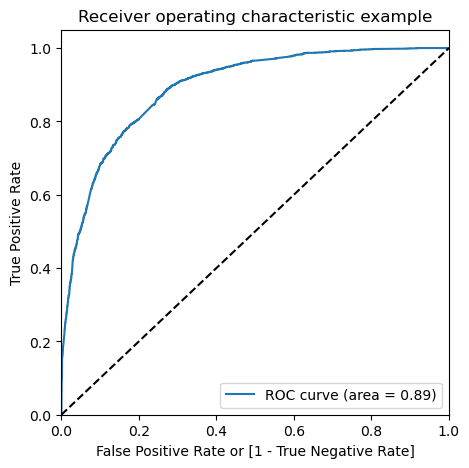

In [791]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

##### The area under the curve of the ROC is 0.89 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [792]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.056238,0,1,0,0,0,0,0,0,0,0,0
1,0,0.253662,0,1,1,1,0,0,0,0,0,0,0
2,0,0.642807,1,1,1,1,1,1,1,1,0,0,0
3,1,0.624158,1,1,1,1,1,1,1,1,0,0,0
4,1,0.911106,1,1,1,1,1,1,1,1,1,1,1


In [793]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.614077  0.982420  0.383355
0.2   0.2  0.763817  0.919869  0.666069
0.3   0.3  0.790269  0.870809  0.739821
0.4   0.4  0.813415  0.769828  0.840717
0.5   0.5  0.816249  0.704824  0.886044
0.6   0.6  0.809321  0.641864  0.914213
0.7   0.7  0.782869  0.522486  0.945967
0.8   0.8  0.764447  0.441537  0.966709
0.9   0.9  0.714376  0.280049  0.986428


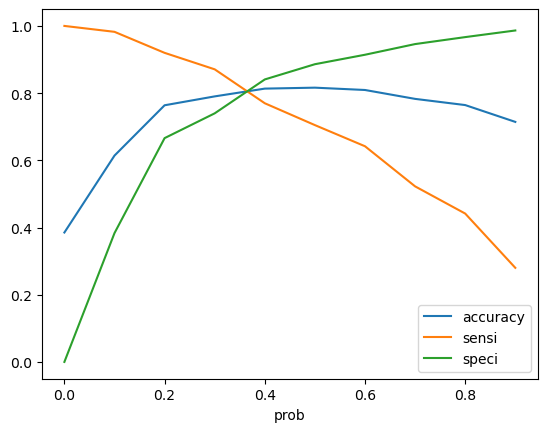

In [794]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## As you can see that around 0.38, you get the optimal values of the three metrics. So let's choose 0.38 as our cutoff now.

In [795]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

## Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8055424342623209

In [796]:
## Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3161,  744],
       [ 491, 1955]], dtype=int64)

In [797]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [798]:
sensitivity=TP/(TP+FN)
sensitivity

0.7992641046606704

In [799]:
specificity=TN/(TN+FP)
specificity

0.8094750320102433

In [800]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,How did you hear about X Education_Dont know,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown
3271,4.0,157,4.0,3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1490,5.0,1513,5.0,2,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,F

In [801]:
##Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [802]:
col = X_train.columns

In [803]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3271,1.0,0.015936,0.070530,0.166667,False,False,True,False,False,False,False,False,False,False,True,False,False,False
1490,1.0,0.019920,0.679695,0.208333,False,True,False,False,False,False,False,False,False,False,False,True,False,False
7936,1.0,0.007968,0.033243,0.083333,False,False,True,False,False,False,False,False,False,False,True,False,False,False
4216,1.0,0.000000,0.000000,0.000000,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3830,1.0,0.031873,0.073675,0.333333,False,False,False,True,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.011952,0.372417,0.062500,False,False,True,False,False,False,False,True,False,False,True,False,False,False
2879,1.0,0.007968,0.264600,0.083333,False,False,True,False,False,False,False,True,False,False,False,False,False,False
6501,1.0,0.031873,0.599730,0.333333,False,True,False,False,False,False,False,False,False,True,False,False,False,False
7155,1.0,0.011952,0.231357,0.125000,False,True,False,False,False,False,False,False,False,False,True,False,False,False


In [804]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm.astype(float))
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.048258
1,1,0.962421
2,0,0.043250
3,1,0.819715
4,0,0.035812


In [805]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.048258,0
1,1,0.962421,1
2,0,0.043250,0
3,1,0.819715,1
4,0,0.035812,0
...,...,...,...
2718,0,0.063487,0
2719,0,0.125433,0
2720,1,0.825698,1
2721,0,0.068969,0


In [806]:
## accuracy
accuracy=metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)
accuracy

0.808666911494675

In [807]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1420,  314],
       [ 207,  782]], dtype=int64)

In [808]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [809]:
## sensitivity
sensitivity=TP/(TP+FN)
sensitivity

0.7906976744186046

In [810]:
#specificity
specificity=TN/(TN+FP)
specificity

0.8189158016147635

In [811]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
## Precision
precision= confusion[1,1]/(confusion[0,1]+confusion[1,1])
## Recall
recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])

print(precision)
print(recall)


0.7948363301060396
0.7048242027800491


In [812]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

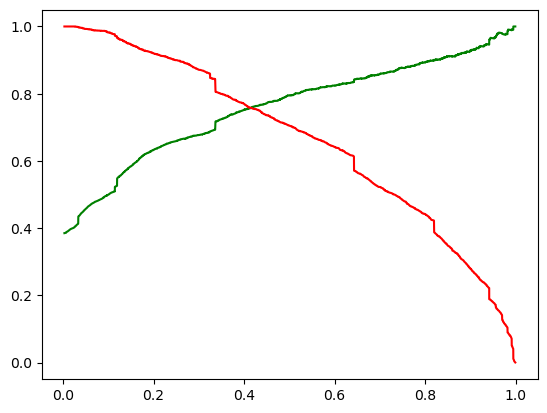

In [813]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [814]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.056238,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.253662,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.642807,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.624158,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.911106,1,1,1,1,1,1,1,1,1,1,1,1


In [815]:
# Accuracy
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
accuracy


0.8127853881278538

In [816]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2


array([[3305,  600],
       [ 589, 1857]], dtype=int64)

In [817]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]
# Precision = TP / TP + FP
Precision= TP / (TP + FP)
Precision

0.7557997557997558

In [818]:
#Recall = TP / TP + FN
Recall=TP / (TP + FN)
Recall

0.759198691741619


#### With the current cut off as 0.42 we have Precision around 75% and Recall around 76%



## Conclusion

Important variables to look out for are:-
    The total time spend on the Website.
    Total number of visits.
    When the last activity was.
Keeping these in mind the X Education can get potential course buyers.